# COVID-19 cases data analysis (till 23/11/2021)
*By Riza Zainudin*

The coronavirus has spread to over 200 countries having a disastrous effect on human life all over the world. While almost every country is dealing with this pandemic, there is no doubt that some countries have been impacted more than others.

About the data:

The dataset of covid-19 has be taken from the website (https://ourworldindata.org/coronavirus-source-data). The data used here is till 23-November-2021 and has recorded on the 24-November-2021. This data is available in CSV type-file. This data will be analysed using the Pandas Dataframe.

### Imports libraries

In [1]:
!pip install seaborn --quiet

In [2]:
#Data Manipulation

import pandas as pd
from IPython.display import display

#Data Calculation

import numpy as np
import math
import time
import datetime

#Data Visualization

import seaborn as sns
import matplotlib.pyplot as plt

## 1) Data Wrangling/ Data Pre-Processing

1. Load the file using Pandas
2. Look at some information about the data & the columns
3. Fix any missing or incorrect values

### Load the time-series data

Most often we don't create data within our code but read it from external sources. Pandas has a large collection of importing (and corresponding exporting) functions available. We will read a tabular CSV file.

In [3]:
data = pd.read_csv(r"C:\Users\USER\Documents\DataStar Program\Project\owid-covid-data.csv")

### Performing data cleaning

In [4]:
data.head(10) 

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
5,AFG,Asia,Afghanistan,2020-02-29,5.0,0.0,0.714,NaN,NaN,0.0,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
6,AFG,Asia,Afghanistan,2020-03-01,5.0,0.0,0.714,NaN,NaN,0.0,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
7,AFG,Asia,Afghanistan,2020-03-02,5.0,0.0,0.000,NaN,NaN,0.0,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
8,AFG,Asia,Afghanistan,2020-03-03,5.0,0.0,0.000,NaN,NaN,0.0,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
9,AFG,Asia,Afghanistan,2020-03-04,5.0,0.0,0.000,NaN,NaN,0.0,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [5]:
data.shape

(135360, 67)

In [6]:
data.count()

iso_code                                   135360
continent                                  126730
location                                   135360
date                                       135360
total_cases                                127894
                                            ...  
human_development_index                    117039
excess_mortality_cumulative_absolute         4723
excess_mortality_cumulative                  4723
excess_mortality                             4723
excess_mortality_cumulative_per_million      4723
Length: 67, dtype: int64

In [7]:
# Null value means missing value
data.isnull().sum()

iso_code                                        0
continent                                    8630
location                                        0
date                                            0
total_cases                                  7466
                                            ...  
human_development_index                     18321
excess_mortality_cumulative_absolute       130637
excess_mortality_cumulative                130637
excess_mortality                           130637
excess_mortality_cumulative_per_million    130637
Length: 67, dtype: int64

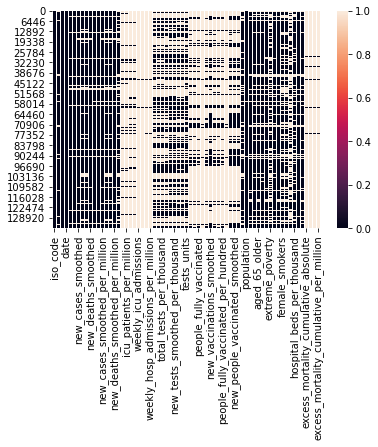

In [8]:
sns.heatmap(data.isnull())
plt.show()

Try to take a look on the columns name in the dataframe.

In [9]:
data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

Create a new datafarame with respective columns that will be used for the analysis

In [10]:
covidtable = data[['iso_code', 'continent', 'location', 'date', 
                    'new_cases','total_cases',
                    'new_deaths', 'total_deaths',
                    'new_vaccinations','total_vaccinations',
                    'people_vaccinated', 'people_fully_vaccinated',
                    'people_fully_vaccinated_per_hundred','population']]

covidtable.head()

,iso_code,continent,location,date,new_cases,total_cases,new_deaths,total_deaths,new_vaccinations,total_vaccinations,people_vaccinated,people_fully_vaccinated,people_fully_vaccinated_per_hundred,population
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0
1,AFG,Asia,Afghanistan,2020-02-25,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0
2,AFG,Asia,Afghanistan,2020-02-26,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0
3,AFG,Asia,Afghanistan,2020-02-27,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0
4,AFG,Asia,Afghanistan,2020-02-28,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0


Continue the data cleaning process with the new dataframe.

Change the very first column, iso_code, into the index of the dataframe.

In [11]:
covidtable.set_index('iso_code').head()

,continent,location,date,new_cases,total_cases,new_deaths,total_deaths,new_vaccinations,total_vaccinations,people_vaccinated,people_fully_vaccinated,people_fully_vaccinated_per_hundred,population
iso_code,,,,,,,,,,,,,
AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0
AFG,Asia,Afghanistan,2020-02-25,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0
AFG,Asia,Afghanistan,2020-02-26,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0
AFG,Asia,Afghanistan,2020-02-27,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0
AFG,Asia,Afghanistan,2020-02-28,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39835428.0


In [12]:
covidtable.groupby("location")['new_cases'].sum().sort_values(ascending = False).head(5)

location
World                  258073797.0
High income            112516334.0
Upper middle income     80778516.0
Asia                    80677401.0
Europe                  72373864.0
Name: new_cases, dtype: float64

It seems that this dataframe includes the group of data such as; whole world, by continents and by incomes. Then, it's necessary to exclude them form the dataframes. Let's check their index.

In [13]:
covidtable.loc[covidtable["location"] == "World"].head()

,iso_code,continent,location,date,new_cases,total_cases,new_deaths,total_deaths,new_vaccinations,total_vaccinations,people_vaccinated,people_fully_vaccinated,people_fully_vaccinated_per_hundred,population
132865,OWID_WRL,NaN,World,2020-01-22,0.0,557.0,0.0,17.0,NaN,NaN,NaN,NaN,NaN,7.874966e+09
132866,OWID_WRL,NaN,World,2020-01-23,98.0,655.0,1.0,18.0,NaN,NaN,NaN,NaN,NaN,7.874966e+09
132867,OWID_WRL,NaN,World,2020-01-24,286.0,941.0,8.0,26.0,NaN,NaN,NaN,NaN,NaN,7.874966e+09
132868,OWID_WRL,NaN,World,2020-01-25,493.0,1434.0,16.0,42.0,NaN,NaN,NaN,NaN,NaN,7.874966e+09
132869,OWID_WRL,NaN,World,2020-01-26,684.0,2118.0,14.0,56.0,NaN,NaN,NaN,NaN,NaN,7.874966e+09


Assuming these particular locations have "OWID" as their iso_code, let's check it.

In [14]:
covidtable.loc[covidtable['iso_code'].str.startswith("OWID"), 'location'].unique()

array(['Africa', 'Asia', 'Europe', 'European Union', 'High income',
       'International', 'Kosovo', 'Low income', 'Lower middle income',
       'North America', 'Northern Cyprus', 'Oceania', 'South America',
       'Upper middle income', 'World'], dtype=object)

It seems correct but why Kosovo and Nothern Cyprus are included among them. It's not correct to use this condition in order to drop the row with "OWID". Let's check the continent column.

In [15]:
covidtable.loc[covidtable['continent'].isna(), 'location'].unique()

array(['Africa', 'Asia', 'Europe', 'European Union', 'High income',
       'International', 'Low income', 'Lower middle income',
       'North America', 'Oceania', 'South America', 'Upper middle income',
       'World'], dtype=object)

Finally, we can now drop the unnecessary rows. New dataframe will be created for the analysis.

In [16]:
covid = covidtable.dropna(subset=['continent'])

In [17]:
covid.loc[covid['iso_code'].str.startswith("OWID"), 'location'].unique()

array(['Kosovo', 'Northern Cyprus'], dtype=object)

In [18]:
covid.dtypes

iso_code                                object
continent                               object
location                                object
date                                    object
new_cases                              float64
total_cases                            float64
new_deaths                             float64
total_deaths                           float64
new_vaccinations                       float64
total_vaccinations                     float64
people_vaccinated                      float64
people_fully_vaccinated                float64
people_fully_vaccinated_per_hundred    float64
population                             float64
dtype: object

However, it is interesting to analyse later about the covid-19 pattern based on income and continents. Let's create a dataframe just for income and continents-based.

In [19]:
covidtable_cont =covidtable.loc[(covidtable["location"] == 'Africa') |
                                    (covidtable["location"] == 'Asia') |
                                    (covidtable["location"] == 'Europe') |
                                    (covidtable["location"] == 'South America') |
                                    (covidtable["location"] == 'North America') |
                                    (covidtable["location"] == 'Oceania')
                                    ]
covidtable_cont['location'].unique()                                

array(['Africa', 'Asia', 'Europe', 'North America', 'Oceania',
       'South America'], dtype=object)

In [20]:
covidtable_income =covidtable.loc[(covidtable["location"] == 'High income') |
                                    (covidtable["location"] == 'Upper middle income') |
                                    (covidtable["location"] == 'Lower middle income') |
                                    (covidtable["location"] == 'Low income')
                                    ]
covidtable_income['location'].unique()    

array(['High income', 'Low income', 'Lower middle income',
       'Upper middle income'], dtype=object)

## 2) Exploratory Data Analysis (EDA)

Which 5 countries have the highest number of total new cases? How about the total deaths?

In [21]:
print('Top 5 countries with highest total new cases:')
print(covid.groupby("location")['new_cases'].sum().sort_values(ascending = False).head(5))

print('\n Top 5 countries with highest total deaths:')
print(covid.groupby("location")['new_deaths'].sum().sort_values(ascending = False).head(5))

Top 5 countries with highest total new cases:
location
United States     47980779.0
India             34534116.0
Brazil            21880076.0
United Kingdom     9985879.0
Russia             9238330.0
Name: new_cases, dtype: float64

 Top 5 countries with highest total deaths:
location
United States    773770.0
Brazil           613066.0
India            466557.0
Mexico           288252.0
Russia           261526.0
Name: new_deaths, dtype: float64


The above data is better tabulated in a dataframe, where each country has a column for the total number of cases and a second column for the total number of deaths. Let's build it.


In [24]:
total_cases = covid.groupby('location')['new_cases'].sum().sort_values(ascending=False)
most_affected_countries = total_cases[:50].index
total_cases = total_cases[:50].values

total_deaths = covid.groupby('location')['new_deaths'].sum()[most_affected_countries].values 

covid_total = pd.DataFrame({'Country': most_affected_countries, 'Total Cases': total_cases, 'Total Deaths': total_deaths})
covid_total.head()

,Country,Total Cases,Total Deaths
0,United States,47980779.0,773770.0
1,India,34534116.0,466557.0
2,Brazil,21880076.0,613066.0
3,United Kingdom,9985879.0,144579.0
4,Russia,9238330.0,261526.0


Which 10 countries have the highest percentage of people fully vaccinated? Is Malaysia among the top 10?

In [22]:
covid.loc[covid['date'] == "2021-11-20",

            ["iso_code", "continent",
            "location","total_cases", "total_deaths",
            "people_fully_vaccinated_per_hundred",
            "people_fully_vaccinated",
            "population"]].sort_values(

                "people_fully_vaccinated_per_hundred",ascending = False ).head(10)

,iso_code,continent,location,total_cases,total_deaths,people_fully_vaccinated_per_hundred,people_fully_vaccinated,population
47233,GIB,Europe,Gibraltar,NaN,NaN,118.18,39816.0,33691.0
77342,MLT,Europe,Malta,38587.0,463.0,83.59,431384.0,516100.0
24922,CHL,South America,Chile,1740496.0,38094.0,82.97,15940942.0,19212362.0
30093,CUB,North America,Cuba,960472.0,8293.0,79.97,9050528.0,11317498.0
113414,KOR,Asia,South Korea,415425.0,3274.0,78.93,40495815.0,51305184.0
20809,KHM,Asia,Cambodia,119826.0,2896.0,78.09,13234187.0,16946446.0
32880,DNK,Europe,Denmark,450974.0,2819.0,76.36,4439208.0,5813302.0
75478,MYS,Asia,Malaysia,2581747.0,29978.0,76.16,24963772.0,32776195.0
59286,IRL,Europe,Ireland,524783.0,5609.0,75.82,3777989.0,4982904.0
22105,CAN,North America,Canada,1772484.0,29543.0,75.75,28837538.0,38067913.0


In [38]:
covid_mys = covid[(covid["location"] == "Malaysia")]
covid_mys

,iso_code,continent,location,date,new_cases,total_cases,new_deaths,total_deaths,new_vaccinations,total_vaccinations,people_vaccinated,people_fully_vaccinated,people_fully_vaccinated_per_hundred,population
74812,MYS,Asia,Malaysia,2020-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32776195.0
74813,MYS,Asia,Malaysia,2020-01-25,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32776195.0
74814,MYS,Asia,Malaysia,2020-01-26,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32776195.0
74815,MYS,Asia,Malaysia,2020-01-27,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32776195.0
74816,MYS,Asia,Malaysia,2020-01-28,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32776195.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75477,MYS,Asia,Malaysia,2021-11-19,6355.0,2575888.0,45.0,29937.0,104590.0,51647068.0,25633375.0,24958190.0,76.15,32776195.0
75478,MYS,Asia,Malaysia,2021-11-20,5859.0,2581747.0,41.0,29978.0,45063.0,51692131.0,25636402.0,24963772.0,76.16,32776195.0
75479,MYS,Asia,Malaysia,2021-11-21,4854.0,2586601.0,24.0,30002.0,31552.0,51723683.0,25638515.0,24967908.0,76.18,32776195.0
75480,MYS,Asia,Malaysia,2021-11-22,4885.0,2591486.0,61.0,30063.0,107622.0,51831305.0,25643556.0,24979622.0,76.21,32776195.0


## 3) Visualisations

First we find the top 10 most affected countries based on the total cases. Since we have the covid_total dataframe, let's plot a bar chart.

Before the data is plotted, it is converted into another form using the melt function where each country has two rows – one for total cases and the second for total deaths. This is now plotted using the barplot function of the seaborn library.

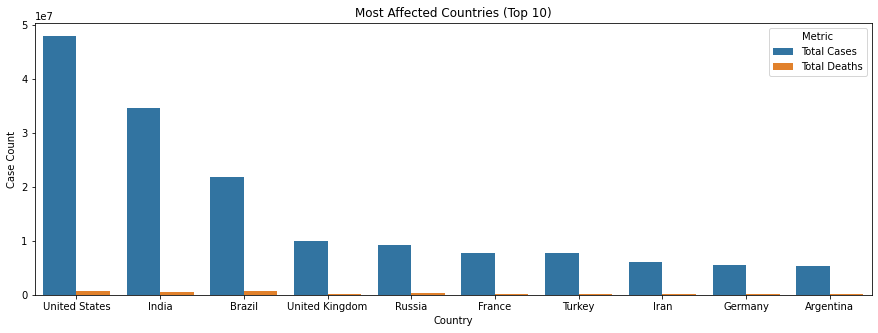

In [25]:
plot_data = pd.melt(covid_total[:10], id_vars = ['Country'],  value_vars=['Total Cases', 'Total Deaths'], 
                var_name='Metric', value_name='Case Count')

plt.figure(figsize=(15, 5))
sns.barplot(x="Country", hue="Metric", y="Case Count", data=plot_data)
plt.title('Most Affected Countries (Top 10)')
plt.show()

<AxesSubplot:xlabel='new_cases', ylabel='location'>

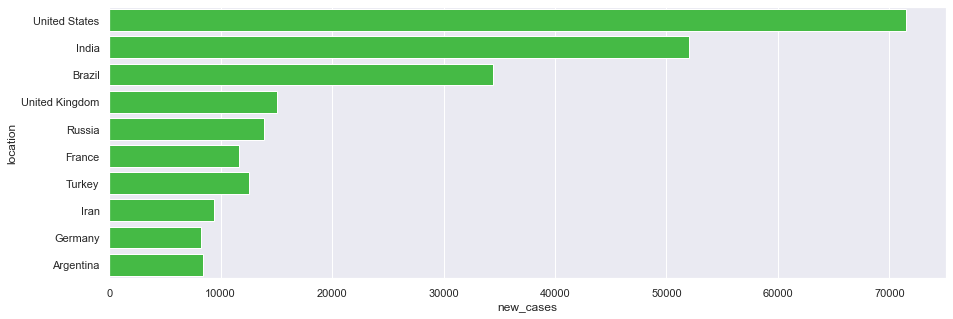

In [44]:
plt.figure(figsize=(15, 5))
data_plot = covid.groupby("location")['new_cases'].sum().sort_values(ascending = False).iloc[:10].index.values
sns.barplot(x = 'new_cases', y = 'location', data = covid, color = 'limegreen' , ci = None, order=data_plot)

<AxesSubplot:xlabel='new_cases', ylabel='location'>

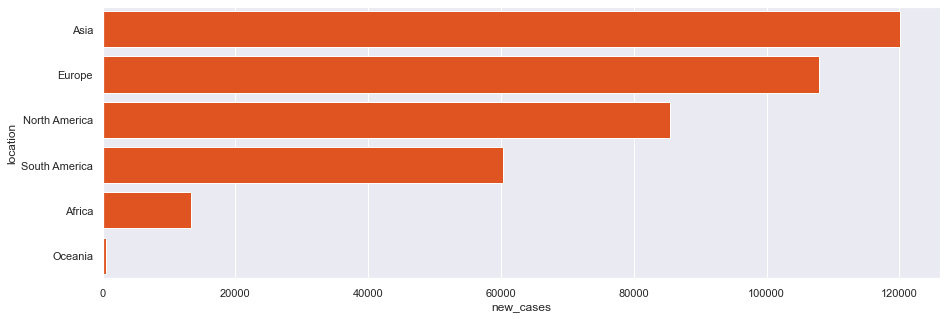

In [45]:
plt.figure(figsize=(15, 5))
data_plot_2 = covidtable_cont.groupby("location")['new_cases'].sum().sort_values(ascending = False).index.values
sns.barplot(x = 'new_cases', y = 'location', data = covidtable_cont, color = 'orangered' , ci = None, order=data_plot_2)

<AxesSubplot:xlabel='new_cases', ylabel='location'>

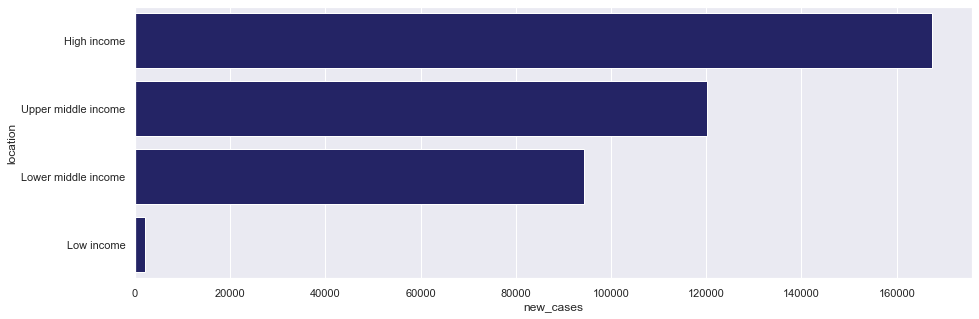

In [46]:
plt.figure(figsize=(15, 5))
data_plot_3 = covidtable_income.groupby("location")['new_cases'].sum().sort_values(ascending = False).index.values
sns.barplot(x = 'new_cases', y = 'location', data = covidtable_income, color = 'midnightblue' , ci = None, order=data_plot_3)

What is the trend of new cases day by day?

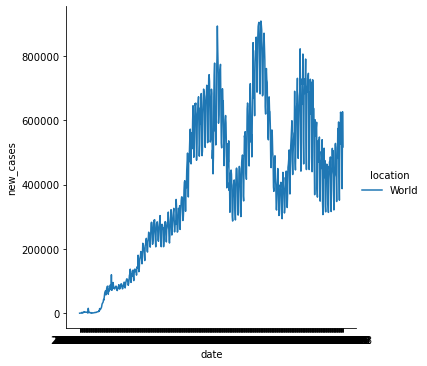

In [31]:
sns.relplot(
    x="date", y="new_cases", kind="line", hue="location", 
    data=covidtable.loc[(covidtable["location"] == "World")])

<Figure size 144000x14400 with 0 Axes>

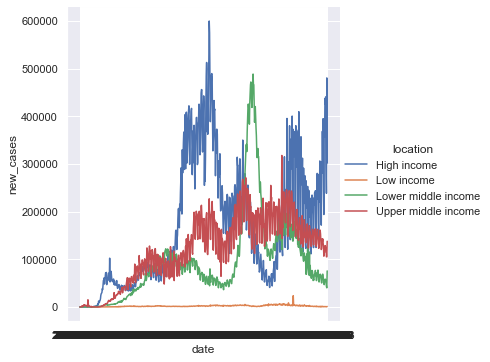

In [48]:
sns.relplot(
    x="date", y="new_cases", kind="line", hue="location", 
    data=covidtable_income)

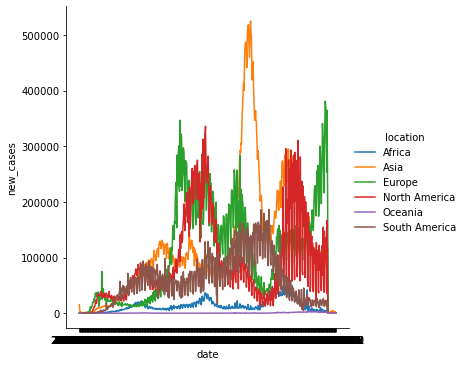

In [30]:
sns.relplot(
    x="date", y="new_cases", kind="line", hue="location", 
    data=covidtable_cont)

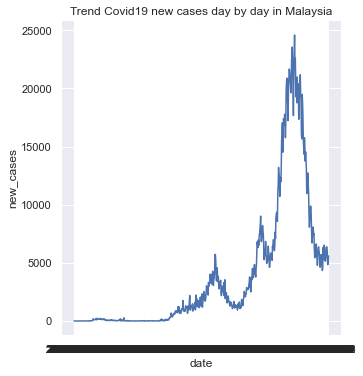

In [49]:
sns.relplot(x="date", y="new_cases", kind="line",data= covid_mys)
plt.title('Trend Covid19 new cases day by day in Malaysia')
plt.show()
